# Importação de Dados

In [1]:
# Bibliotecas importadas:
import csv
import gc
from pathlib import Path 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import seed
import plotly.express as px

In [2]:
# Formatação:
pd.options.display.float_format = "{:,.2f}".format

# Carregar o dataset:
csv_path = 'arquivos/UkraineCombinedTweetsDeduped_FEB27.csv'
df = pd.read_csv(csv_path, 
                 index_col=0,
                 encoding='utf-8', 
                 quoting=csv.QUOTE_ALL)

# Ver linhas e colunas do dataframe:
print(df.shape)

# Mostrar os tipos dos dados:
print (df.dtypes)

# Mostrar os dados:
df.head().T

(357018, 17)
userid             int64
username          object
acctdesc          object
location          object
following          int64
followers          int64
totaltweets        int64
usercreatedts     object
tweetid            int64
tweetcreatedts    object
retweetcount       int64
text              object
hashtags          object
language          object
coordinates       object
favorite_count     int64
extractedts       object
dtype: object


,1141800,1141801,1141802,1141803,1141804
userid,1466752038960656385,1111276809302216710,1364735420236505088,597779527,1646145848
username,Curtin2Tiffany,5ela60,StatistWomen,OurTurnToRescue,DrWAVeSportCd1
acctdesc,I am just like everyone else. The universe ex...,الأب ..الأخ ..الجار ..الحبيب .. السديك,🇹🇷,"Issues: Threats to Democracy, Racism, GOP corr...","Addicted to News, Music, Cooking, Gardens, Out..."
location,"Colorado, USA",NaN,Cumhur İttifakı,NaN,USA
following,253,167,1771,4847,5002
followers,40,9,1766,4080,3950
totaltweets,94,656,37009,33666,466629
usercreatedts,2021-12-03 12:52:22.000000,2019-03-28 14:40:12.000000,2021-02-25 00:35:28.000000,2012-06-02 21:53:59.000000,2013-08-04 21:07:08.000000
tweetid,1497724980259262467,1497724980271984641,1497724980322349058,1497724980573966346,1497724980653694976
tweetcreatedts,2022-02-27 00:07:16,2022-02-27 00:07:16,2022-02-27 00:07:16,2022-02-27 00:07:16,2022-02-27 00:07:16


In [3]:
# Quantidade de linhas:
df.shape

(357018, 17)

In [4]:
# Colunas:
df.columns

Index(['userid', 'username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'coordinates',
       'favorite_count', 'extractedts'],
      dtype='object')

#  Análise de Idioma

In [5]:
# Quantidade de tweets por idioma:
df.language.value_counts()

en     227513
fr      19402
es      16227
de      16199
und     13800
        ...  
si          5
is          2
sd          2
hy          1
km          1
Name: language, Length: 62, dtype: int64

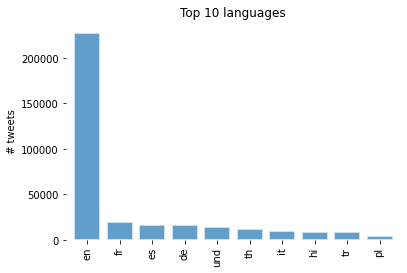

In [4]:
# Gráfico de Quantidade de tweets por Idioma:
df.language.value_counts()[0:10].plot(kind='bar',
                                    width=.8, 
                                    edgecolor='white', 
                                    #color='lightblue',
                                    ylabel= '# tweets',
                                    linewidth=2,
                                    alpha = 0.7)
plt.title('Top 10 languages')
#plt.legend(loc=0)
plt.box(False)
plt.show()

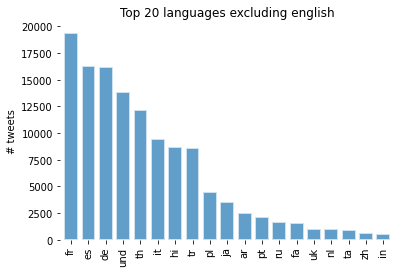

In [7]:
# Gráfico de Quantidade de tweets por Idioma - excluindo inglês:
df.language.value_counts()[1:20].plot(kind='bar',
                                    width=.8, 
                                    edgecolor='white', 
                                    #color=['orange','red'],
                                    ylabel= '# tweets',
                                    linewidth=2,
                                    alpha = 0.7)
plt.title('Top 20 languages excluding english')
#plt.legend(loc=0)
plt.box(False)
plt.show()

# Análise de Localização

In [8]:
# Quantidade de tweets por localização:
df.location.value_counts()

United States               2601
India                       2482
France                      1496
London, England             1142
Paris, France               1070
                            ... 
𝙽𝙲𝚃 ☻ 𝙳𝚈 𝙹𝙽 𝙹𝙼  🕯              1
eotteohge saenggaghae 🌤️       1
dead inside                    1
Zgornji Tuhinj                 1
Greenwich London               1
Name: location, Length: 62470, dtype: int64

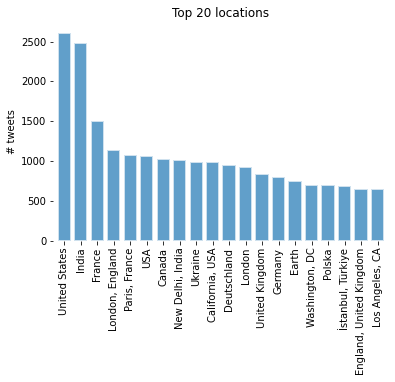

In [9]:
# Gráfico dos 20 locais com maiores publicações:
df.location.value_counts()[0:20].plot(kind='bar',
                                    width=.8, 
                                    edgecolor='white', 
                                    ylabel= '# tweets',
                                    linewidth=2,
                                    alpha = 0.7)
plt.title('Top 20 locations')
plt.box(False)
plt.show()

# Data de criação do Twitter:

In [10]:
# Quantidade de usuários criados por data:
df.usercreatedts.value_counts()

2021-08-18 06:44:09.000000    259
2016-06-29 17:26:33.000000    193
2020-01-27 14:11:32.000000    151
2021-12-14 23:50:44.000000    132
2009-04-14 07:13:06.000000     96
                             ... 
2015-12-18 05:29:20.000000      1
2018-09-24 10:00:36.000000      1
2021-02-13 21:17:04.000000      1
2011-12-03 22:32:08.000000      1
2012-08-17 19:32:47.000000      1
Name: usercreatedts, Length: 247212, dtype: int64

# Corpus

In [3]:
# Bibliotecas:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
# Stopwords:
stopwords = set(STOPWORDS)

# Transformando as letras em minúsculo

In [5]:
# Transformando as letras em minúsculo:
df['text'] = df['text'].astype(str).str.lower()
df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#ukrainerussiawar captured russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#ukrayna güvenlik servisi, #rus finosu #kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979
1141803,597779527,OurTurnToRescue,"Issues: Threats to Democracy, Racism, GOP corr...",NaN,4847,4080,33666,2012-06-02 21:53:59.000000,1497724980573966346,2022-02-27 00:07:16,1,we elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,NaN,0,2022-02-27 00:09:33.051823
1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,2013-08-04 21:07:08.000000,1497724980653694976,2022-02-27 00:07:16,277,ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0,2022-02-27 00:09:33.043812


# Tokenização

In [6]:
from nltk.tokenize import RegexpTokenizer

In [7]:
## Remover urls:
df['text']=df['text'].replace(to_replace=r'http\S+|www\S+|https\S+', regex=True, value='')
## Remover @ e #:
df['text']=df['text'].replace(to_replace=r'\@\w+|\#', regex=True, value='')

## Utilizar apenas palavras e números:
regexp = RegexpTokenizer('\w+')
df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,ukrainerussiawar captured russian soldiers\n\n...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,"[ukrainerussiawar, captured, russian, soldiers..."
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,"[like, everybody, else, i, am, rooting, for, u..."
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"ukrayna güvenlik servisi, rus finosu kadirov'u...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,"[ukrayna, güvenlik, servisi, rus, finosu, kadi..."


# Stopwords


In [8]:
# Biblioteca:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Isabella
[nltk_data]     Calfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Biblioteca:
from nltk.corpus import stopwords

# Lista de stopwords em inglês:
stopwords = nltk.corpus.stopwords.words("english")

# Acrescentando palavras:
my_stopwords = ['https']
stopwords.extend(my_stopwords)

## Remove stopwords

In [10]:
# Remover stopwords:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,ukrainerussiawar captured russian soldiers\n\n...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,"[ukrainerussiawar, captured, russian, soldiers..."
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,"[like, everybody, else, rooting, ukraine, figh..."
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"ukrayna güvenlik servisi, rus finosu kadirov'u...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,"[ukrayna, güvenlik, servisi, rus, finosu, kadi..."


# Remover palavras pouco frequentes

In [11]:
# Identificação e remoção das palavras que aparecem menos de 2x no conjunto de dados:
df['text_token'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,ukrainerussiawar captured russian soldiers\n\n...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,ukrainerussiawar captured russian soldiers sai...
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,like everybody else rooting ukraine fight russ...
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"ukrayna güvenlik servisi, rus finosu kadirov'u...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,ukrayna güvenlik servisi rus finosu kadirov ko...


## Corpus contendo apenas tweets em inglês

In [29]:
all_words = ' '.join([word for word in df['text_token'][df.language=="en"]])

# WordCloud (Nuvem de Palavras)

(-0.5, 599.5, 399.5, -0.5)

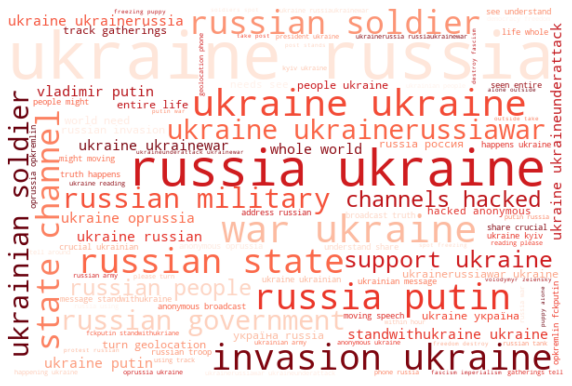

In [21]:
# Uma opção de wordCloud (utilizando associações de palavras automaticamente da ferramenta):
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     max_words=100,
                     background_color="white",
                     colormap="Reds",
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

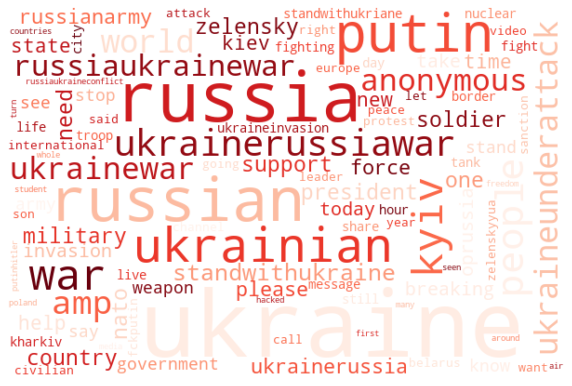

In [38]:
# Opção de wordCloud (sem associação automática da ferramenta)
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                     max_words=100,
                     background_color="white",
                     colormap="Reds",
                     repeat=False,
                     collocations=False,
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [ ]:
# Incluindo a máscara de tank:
tank_mask = np.array(Image.open("tank.png"))
tank_mask

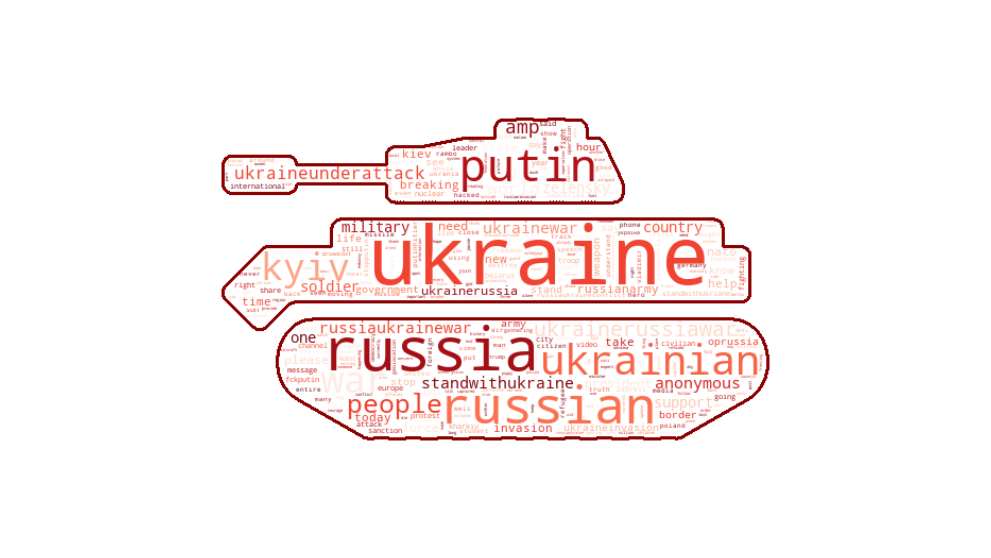

In [24]:
# Criando o wordcloud com a máscara de tank
wc = WordCloud(background_color="white", 
               max_words=1000, 
               mask=tank_mask,
               contour_width=3, 
               colormap="Reds",
               repeat=False,
               collocations=False,
               contour_color='darkred')

wc.generate(all_words)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Distribuição de Frequência das Palavras

In [30]:
# Pacotes:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Isabella
[nltk_data]     Calfa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# Bibliotecas:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


# Tokenização das palavras:
words = word_tokenize(all_words)

# Definição das frequências:
fd = FreqDist(words)

In [17]:
# 20 palavras mais comuns:

fd.most_common(20)

[('ukraine', 196548),
 ('russia', 95598),
 ('russian', 66042),
 ('putin', 54011),
 ('ukrainian', 34992),
 ('kyiv', 34246),
 ('war', 34226),
 ('people', 27897),
 ('ukrainerussiawar', 25712),
 ('amp', 21843),
 ('ukraineunderattack', 19207),
 ('world', 18887),
 ('anonymous', 17529),
 ('ukrainewar', 17479),
 ('russiaukrainewar', 16752),
 ('standwithukraine', 15950),
 ('military', 12963),
 ('country', 11999),
 ('support', 11991),
 ('zelensky', 11707)]

In [32]:
# Obtendo as 20 palavras mais comuns:
top_20 = fd.most_common(20)
fdist = pd.Series(dict(top_20))

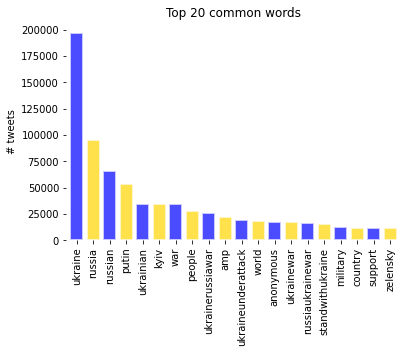

In [31]:
# Mostrando as palavras mais comuns no gráfico:
fdist.plot(kind='bar',
                width=.8, 
                edgecolor='white', 
                color=['blue','gold'],
                ylabel= '# tweets',
                linewidth=2,
                alpha = 0.7)
plt.title('Top 20 common words')
#plt.legend(loc=0)
plt.box(False)
plt.show()

## Análise dos Bigramas

In [33]:
#Bibliotecas:
from nltk.util import ngrams 

# Criação dos bigramas: 
df['bigrams'] = df['text_token'].apply(lambda x: list(ngrams(x.split(), 2)))
df.head(3)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,text_token,bigrams
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,ukrainerussiawar captured russian soldiers\n\n...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131,ukrainerussiawar captured russian soldiers sai...,"[(ukrainerussiawar, captured), (captured, russ..."
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,like everybody else i am rooting for ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011,like everybody else rooting ukraine fight russ...,"[(like, everybody), (everybody, else), (else, ..."
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"ukrayna güvenlik servisi, rus finosu kadirov'u...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979,ukrayna güvenlik servisi rus finosu kadirov ko...,"[(ukrayna, güvenlik), (güvenlik, servisi), (se..."


In [34]:
# Bibliotecas:
from collections import Counter
import functools

# Definição dos bigramas em listas:
bigrams_words = df['bigrams']

l = functools.reduce(lambda x, y: list(x)+list(y), zip(bigrams_words))
flatten = [item for sublist in l for item in sublist]

In [35]:
# Contagens dos mais comuns:
counts = Counter(flatten).most_common()


In [40]:
# Criação de df:
df2 = pd.DataFrame.from_records(counts, columns=['Phrase', 'Count'])
df2['Phrase']= df2['Phrase'].apply(lambda x: ' '.join([w for w in x]))
df2.head(3)

,Phrase,Count
0,ukraine russia,21296
1,russia ukraine,13350
2,war ukraine,5702


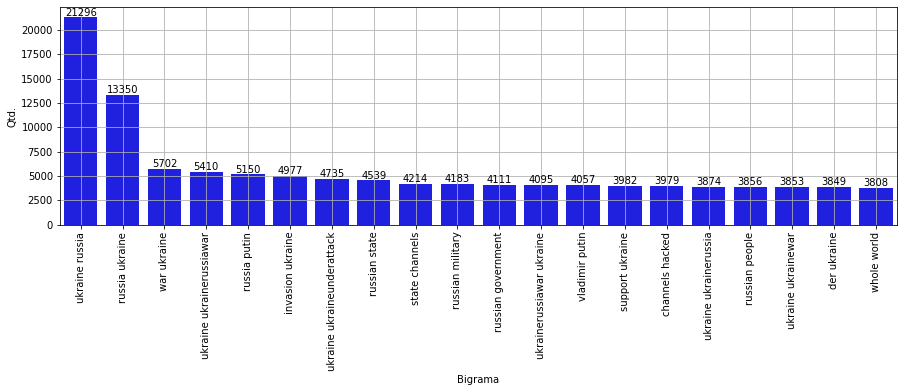

In [41]:
# Distribuição de frequência dos bigramas:
df2 = df2.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df2, x= "Phrase", y = "Count",color="blue")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel = 'Qtd.')
ax.set(xlabel = 'Bigrama')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

O wordCloud dos bigramas está montado acima.

# Associação de Palavras

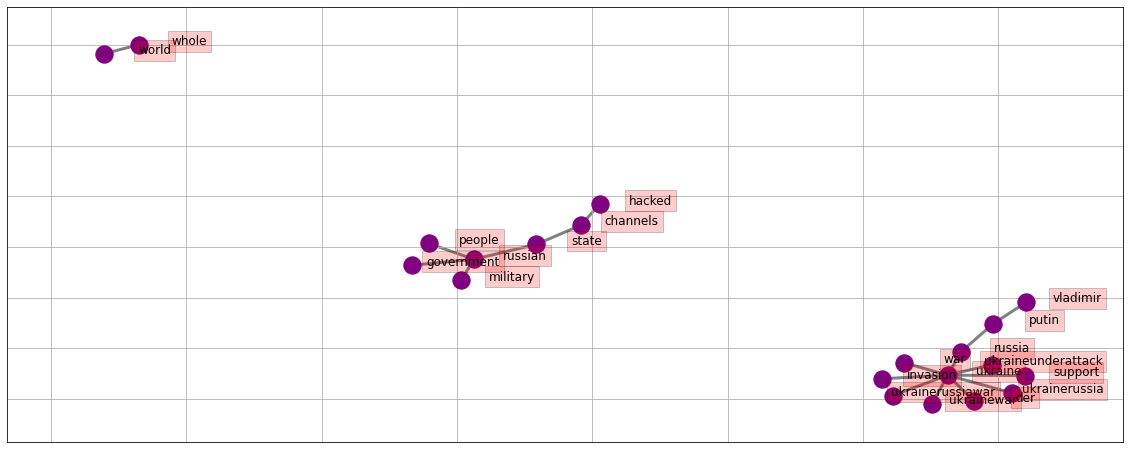

In [113]:
# Visualização em rede:
top_20_bigrams = Counter(flatten).most_common(20)
bigram_df = pd.DataFrame(top_20_bigrams,columns=['bigram','count'])
d = bigram_df.set_index('bigram').T.to_dict('records')

# Criação do gráfico:
G = nx.Graph()
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


fig, ax = plt.subplots(figsize=(20, 8))
pos = nx.spring_layout(G, k=2)

## Plotando redes:
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)
## Legendas:
for key, value in pos.items():
    x, y = value[0]+0.075, value[1]
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.2),
            horizontalalignment='center', fontsize=12)
plt.grid()
plt.show()

# Modelagem de Tópicos

Disponível no outro notebook.

# Análise de Sentimentos

In [46]:
# Bibliotecas: 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df_sa=df.reset_index(drop=True)

scores = []

# Declarando as variáveis para as pontuações:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
sentiment_list = []

# Definição das polarizações do texto:
for i in range(df_sa['text'].shape[0]):
    compound = analyzer.polarity_scores(df_sa['text'][i])["compound"] # composição
    pos = analyzer.polarity_scores(df_sa['text'][i])["pos"] # componentes positivos
    neu = analyzer.polarity_scores(df_sa['text'][i])["neu"] # componentes negativos
    neg = analyzer.polarity_scores(df_sa['text'][i])["neg"] # componentes neutros
    if compound >= 0.05:
        sent = 'Positive'
    elif compound <= -.05:
        sent = 'Negative'
    else:
        sent = 'Neutral'
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu,
                       "Sentiment": sent # Resultado dos componentes
                  })

In [54]:
# Inclusão dos sentimentos no dataframe:

sentiments_score = pd.DataFrame.from_dict(scores)
df_sa = df_sa.join(sentiments_score)

df_sa.to_csv('arquivos/sentiment.csv')

<AxesSubplot:xlabel='count', ylabel='Sentiment'>

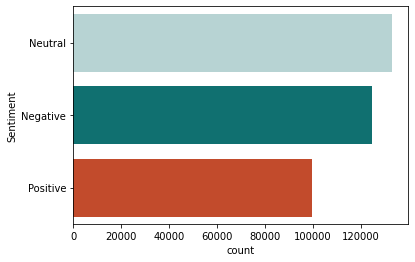

In [31]:
# Gráfico de Sentimentos:
sns.countplot(y='Sentiment', 
             data=df_sa, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             ) 


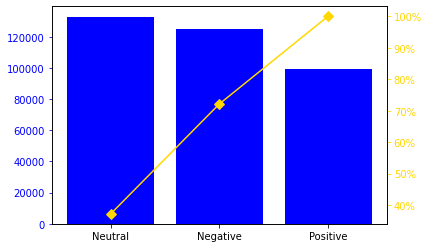

In [54]:
# Gráfico de pareto dos sentimentos:
from matplotlib.ticker import PercentFormatter

df3=pd.DataFrame(df_sa[['Sentiment','tweetid']].groupby(['Sentiment']).count())
df3=df3.rename(columns={'Sentiment':'Sentiment','tweetid':'Qtd'}) # Renomear colunas
df3 = df3.sort_values(by='Qtd',ascending=False) # Ordenar colunas
df3["cumpercentage"] = df3["Qtd"].cumsum()/df3["Qtd"].sum()*100 # Soma acumulativa


fig, ax = plt.subplots()
ax.bar(df3.index, df3["Qtd"], color="blue")
ax2 = ax.twinx()
ax2.plot(df3.index, df3["cumpercentage"], color="gold", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="blue")
ax2.tick_params(axis="y", colors="gold")
plt.show()